In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import Normalizer #SKlearn is the library for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_csv("fifa21_male2.csv")
df

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Cleaning/Wrangling/EDA

- Change headers names

In [4]:
df.columns = [df.columns[i].lower().replace(' ','_') for i in range (len(df.columns))]
df.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

In [6]:
df1 = df[['age','ova','bp','pot','height','weight','growth','value','w/f','sm','a/w','d/w','foot']]
df1

,age,ova,bp,pot,height,weight,growth,value,w/f,sm,a/w,d/w,foot
0,33,69,LWB,69,"6'0""",181lbs,0,€625K,3 ★,2★,Medium,High,Left
1,37,71,CM,71,"5'10""",143lbs,0,€600K,4 ★,3★,Medium,Medium,Right
2,33,71,CAM,71,"5'9""",161lbs,0,€1.1M,4 ★,4★,Medium,Low,Right
3,36,68,ST,82,"5'11""",165lbs,14,€0,3 ★,1★,NaN,NaN,Right
4,36,81,CAM,81,"5'7""",150lbs,0,€5.5M,4 ★,4★,High,Medium,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,CB,69,"6'6""",165lbs,5,€550K,2 ★,2★,Medium,Medium,Right
17121,18,56,CAM,66,"5'10""",170lbs,10,€130K,3 ★,2★,Medium,Medium,Right
17122,18,56,RB,67,"5'9""",154lbs,11,€130K,3 ★,2★,Medium,Medium,Right
17123,20,62,RB,73,"5'9""",148lbs,11,€475K,4 ★,2★,High,Medium,Right


In [26]:
df1 = df1.rename(columns={'ova': 'overall','bp':'best_position','pot':'potential','w/f':'weak_foot',
                                                   'sm':'skill_moves','a/w':'attacking_work_rate','d/w':'defensive_work_rate'})

In [27]:
df1

,age,overall,best_position,potential,height,weight,growth,value,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,foot
0,33,69,LWB,69,"6'0""",181lbs,0,625000,3.0,2★,Medium,High,Left
1,37,71,CM,71,"5'10""",143lbs,0,600000,4.0,3★,Medium,Medium,Right
2,33,71,CAM,71,"5'9""",161lbs,0,1100000,4.0,4★,Medium,Low,Right
4,36,81,CAM,81,"5'7""",150lbs,0,5500000,4.0,4★,High,Medium,Right
5,27,66,RW,70,"5'8""",163lbs,4,725000,2.0,3★,Medium,Medium,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,CB,69,"6'6""",165lbs,5,550000,2.0,2★,Medium,Medium,Right
17121,18,56,CAM,66,"5'10""",170lbs,10,130000,3.0,2★,Medium,Medium,Right
17122,18,56,RB,67,"5'9""",154lbs,11,130000,3.0,2★,Medium,Medium,Right
17123,20,62,RB,73,"5'9""",148lbs,11,475000,4.0,2★,High,Medium,Right


- Deal with NaN values

In [11]:
df1.isna().sum()

age                     0
overall                 0
best_position           0
potential               0
height                  0
weight                  0
growth                  0
value                   0
w/f                     0
skill_moves             0
attacking_work_rate    89
defensive_work_rate    89
foot                    0
dtype: int64

In [44]:
df1=df1.dropna()
df1

,age,overall,best_position,potential,height,weight,growth,value,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,foot
0,33,69,LWB,69,"6'0""",181lbs,0,625000,3,2★,Medium,High,Left
1,37,71,CM,71,"5'10""",143lbs,0,600000,4,3★,Medium,Medium,Right
2,33,71,CAM,71,"5'9""",161lbs,0,1100000,4,4★,Medium,Low,Right
4,36,81,CAM,81,"5'7""",150lbs,0,5500000,4,4★,High,Medium,Right
5,27,66,RW,70,"5'8""",163lbs,4,725000,2,3★,Medium,Medium,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,19,60,GK,72,"6'1""",174lbs,12,300000,2,1★,Medium,Medium,Right
17120,22,64,CB,69,"6'6""",165lbs,5,550000,2,2★,Medium,Medium,Right
17121,18,56,CAM,66,"5'10""",170lbs,10,130000,3,2★,Medium,Medium,Right
17122,18,56,RB,67,"5'9""",154lbs,11,130000,3,2★,Medium,Medium,Right


In [45]:
df1.isna().sum()

age                    0
overall                0
best_position          0
potential              0
height                 0
weight                 0
growth                 0
value                  0
weak_foot              0
skill_moves            0
attacking_work_rate    0
defensive_work_rate    0
foot                   0
dtype: int64

### Let's work on weight,height,skill_moves value columns.

In [41]:
df1["value"] = df1["value"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
df1

,age,overall,best_position,potential,height,weight,growth,value,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,foot
0,33,69,LWB,69,"6'0""",181lbs,0,625000,3,2★,Medium,High,Left
1,37,71,CM,71,"5'10""",143lbs,0,600000,4,3★,Medium,Medium,Right
2,33,71,CAM,71,"5'9""",161lbs,0,1100000,4,4★,Medium,Low,Right
4,36,81,CAM,81,"5'7""",150lbs,0,5500000,4,4★,High,Medium,Right
5,27,66,RW,70,"5'8""",163lbs,4,725000,2,3★,Medium,Medium,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,CB,69,"6'6""",165lbs,5,550000,2,2★,Medium,Medium,Right
17121,18,56,CAM,66,"5'10""",170lbs,10,130000,3,2★,Medium,Medium,Right
17122,18,56,RB,67,"5'9""",154lbs,11,130000,3,2★,Medium,Medium,Right
17123,20,62,RB,73,"5'9""",148lbs,11,475000,4,2★,High,Medium,Right


In [47]:
df1["skill_moves"] = df1["skill_moves"].replace({'★': ''}, regex=True).astype(int)
df1

,age,overall,best_position,potential,height,weight,growth,value,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,foot
0,33,69,LWB,69,"6'0""",181lbs,0,625000,3,2,Medium,High,Left
1,37,71,CM,71,"5'10""",143lbs,0,600000,4,3,Medium,Medium,Right
2,33,71,CAM,71,"5'9""",161lbs,0,1100000,4,4,Medium,Low,Right
4,36,81,CAM,81,"5'7""",150lbs,0,5500000,4,4,High,Medium,Right
5,27,66,RW,70,"5'8""",163lbs,4,725000,2,3,Medium,Medium,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,19,60,GK,72,"6'1""",174lbs,12,300000,2,1,Medium,Medium,Right
17120,22,64,CB,69,"6'6""",165lbs,5,550000,2,2,Medium,Medium,Right
17121,18,56,CAM,66,"5'10""",170lbs,10,130000,3,2,Medium,Medium,Right
17122,18,56,RB,67,"5'9""",154lbs,11,130000,3,2,Medium,Medium,Right


In [49]:
df1['weight'] = df1['weight'].str.rstrip('lbs').astype(int)
df1['height'] = df1['height'].str.replace('\'', '.').str.replace('"', '').astype(float)
df1

,age,overall,best_position,potential,height,weight,growth,value,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,foot
0,33,69,LWB,69,6.0,181,0,625000,3,2,Medium,High,Left
1,37,71,CM,71,5.1,143,0,600000,4,3,Medium,Medium,Right
2,33,71,CAM,71,5.9,161,0,1100000,4,4,Medium,Low,Right
4,36,81,CAM,81,5.7,150,0,5500000,4,4,High,Medium,Right
5,27,66,RW,70,5.8,163,4,725000,2,3,Medium,Medium,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,19,60,GK,72,6.1,174,12,300000,2,1,Medium,Medium,Right
17120,22,64,CB,69,6.6,165,5,550000,2,2,Medium,Medium,Right
17121,18,56,CAM,66,5.1,170,10,130000,3,2,Medium,Medium,Right
17122,18,56,RB,67,5.9,154,11,130000,3,2,Medium,Medium,Right


### Categorical and numerical columns

In [50]:
categorical = df1.select_dtypes(include = np.object)
categorical

,best_position,attacking_work_rate,defensive_work_rate,foot
0,LWB,Medium,High,Left
1,CM,Medium,Medium,Right
2,CAM,Medium,Low,Right
4,CAM,High,Medium,Right
5,RW,Medium,Medium,Right
...,...,...,...,...
17119,GK,Medium,Medium,Right
17120,CB,Medium,Medium,Right
17121,CAM,Medium,Medium,Right
17122,RB,Medium,Medium,Right


In [52]:
numerical = df1.select_dtypes(include = np.number)
numerical

,age,overall,potential,height,weight,growth,value,weak_foot,skill_moves
0,33,69,69,6.0,181,0,625000,3,2
1,37,71,71,5.1,143,0,600000,4,3
2,33,71,71,5.9,161,0,1100000,4,4
4,36,81,81,5.7,150,0,5500000,4,4
5,27,66,70,5.8,163,4,725000,2,3
...,...,...,...,...,...,...,...,...,...
17119,19,60,72,6.1,174,12,300000,2,1
17120,22,64,69,6.6,165,5,550000,2,2
17121,18,56,66,5.1,170,10,130000,3,2
17122,18,56,67,5.9,154,11,130000,3,2


### Exploration

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17035 entries, 0 to 17123
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  17035 non-null  int64  
 1   overall              17035 non-null  int64  
 2   best_position        17035 non-null  object 
 3   potential            17035 non-null  int64  
 4   height               17035 non-null  float64
 5   weight               17035 non-null  int32  
 6   growth               17035 non-null  int64  
 7   value                17035 non-null  int32  
 8   weak_foot            17035 non-null  int32  
 9   skill_moves          17035 non-null  int32  
 10  attacking_work_rate  17035 non-null  object 
 11  defensive_work_rate  17035 non-null  object 
 12  foot                 17035 non-null  object 
dtypes: float64(1), int32(4), int64(4), object(4)
memory usage: 1.6+ MB


In [54]:
summary = df1.describe().T

summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
age,17035.0,25.0,5.0,16.0,21.0,25.0,29.0,53.0,8.0
overall,17035.0,67.0,7.0,45.0,62.0,67.0,72.0,93.0,10.0
potential,17035.0,72.0,6.0,47.0,69.0,72.0,76.0,95.0,7.0
height,17035.0,6.0,0.0,5.0,5.0,6.0,6.0,7.0,1.0
weight,17035.0,166.0,16.0,110.0,154.0,165.0,176.0,243.0,22.0
growth,17035.0,6.0,6.0,0.0,0.0,4.0,9.0,26.0,9.0
value,17035.0,2580922.0,5383555.0,0.0,375000.0,800000.0,2400000.0,105500000.0,2025000.0
weak_foot,17035.0,3.0,1.0,1.0,3.0,3.0,3.0,5.0,0.0
skill_moves,17035.0,2.0,1.0,1.0,2.0,2.0,3.0,5.0,1.0


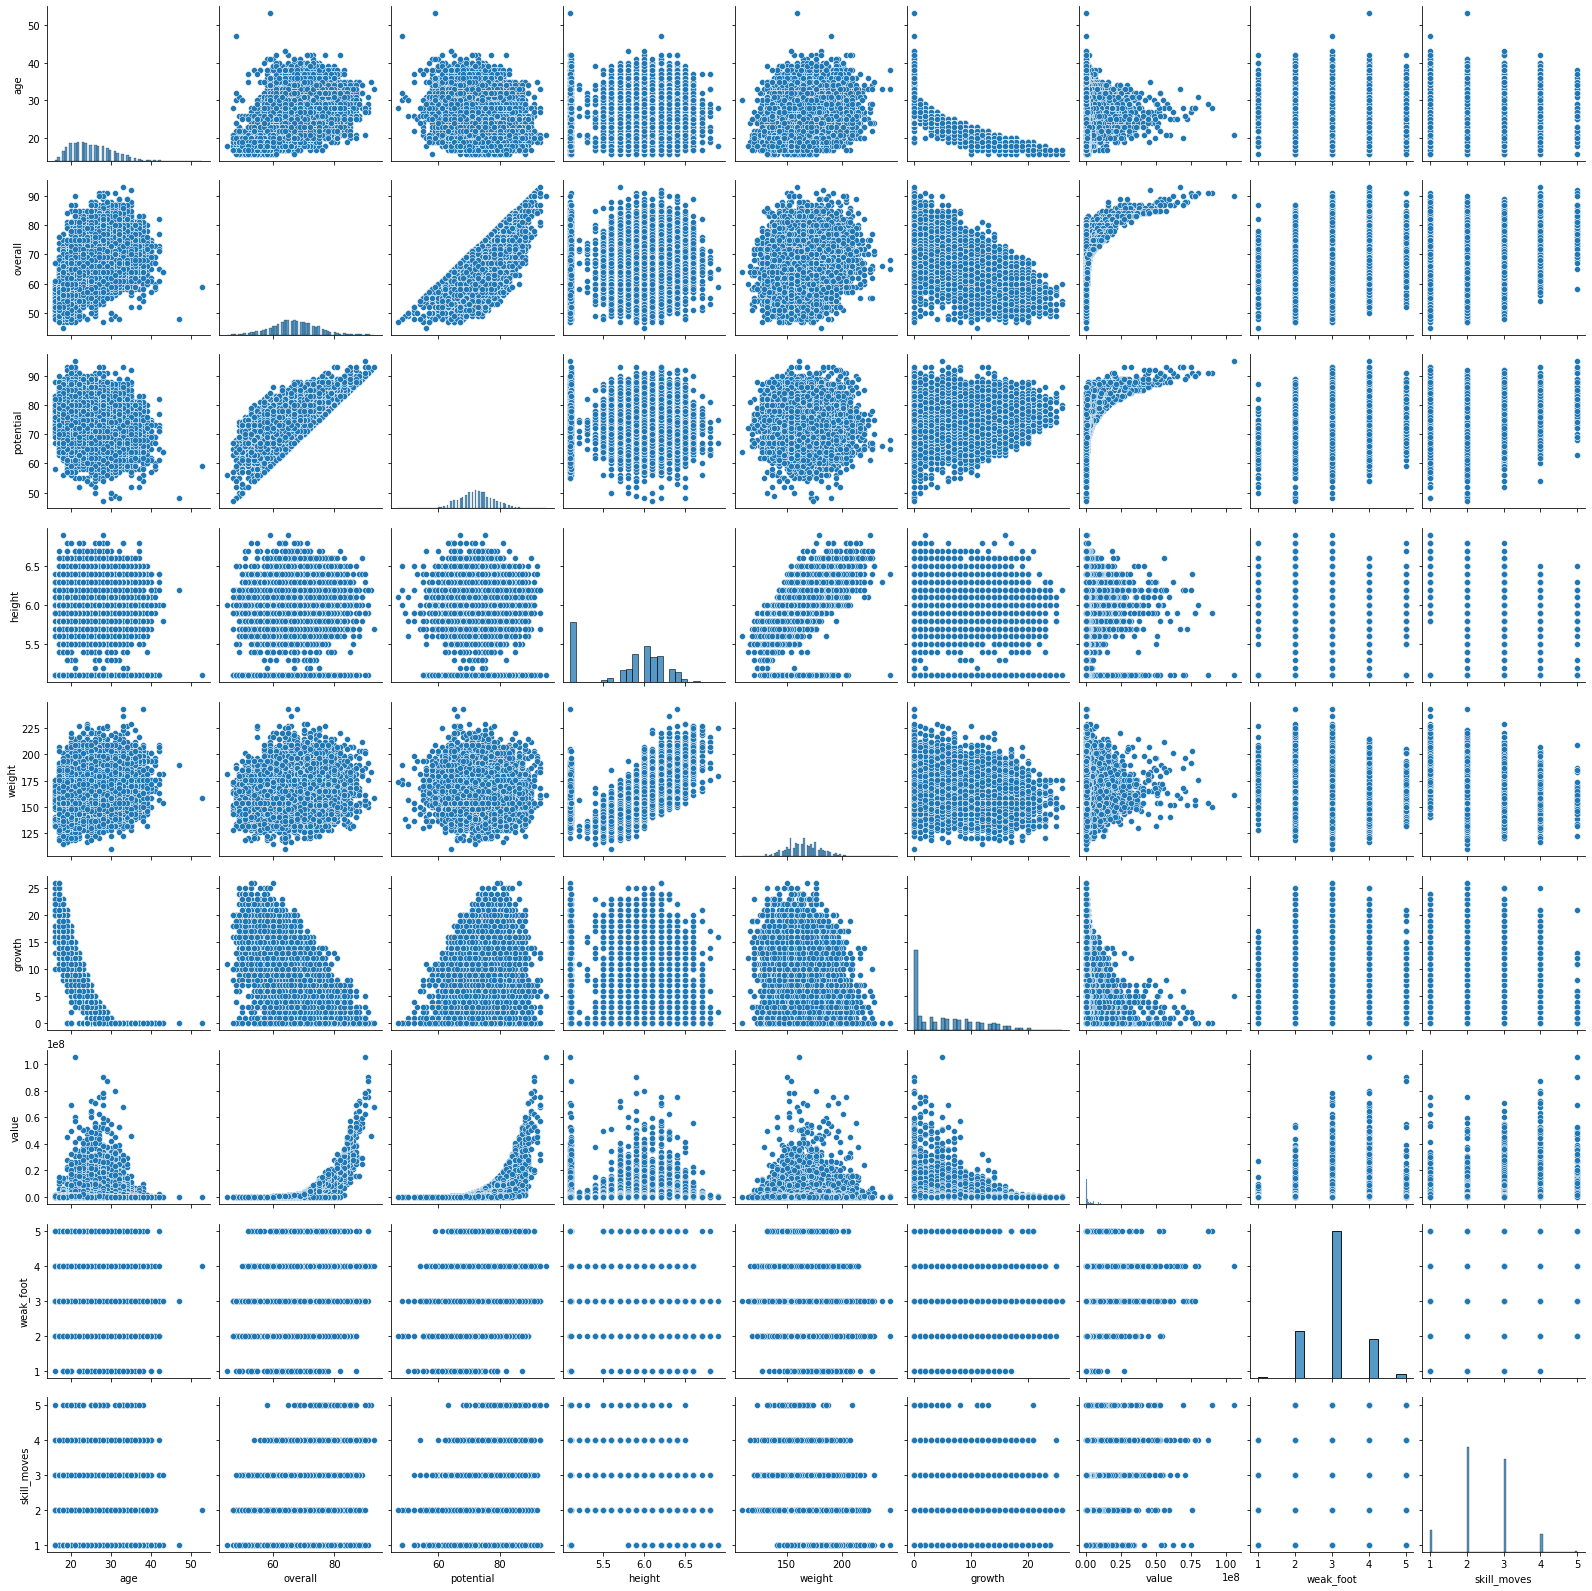

In [57]:
sns.pairplot(df1)

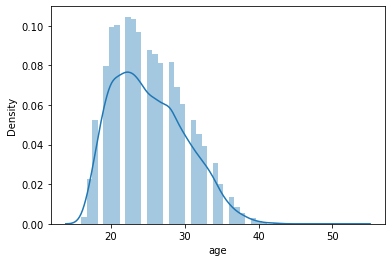

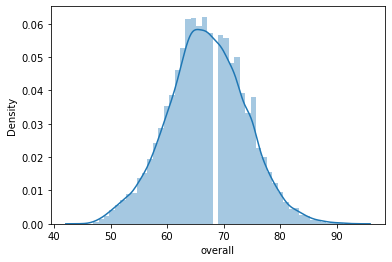

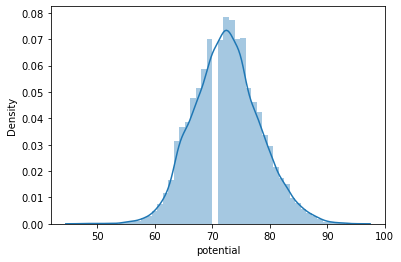

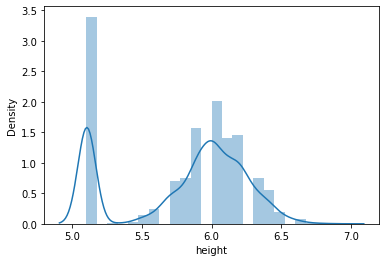

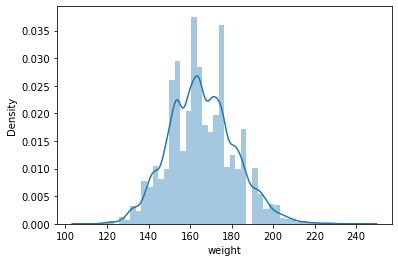

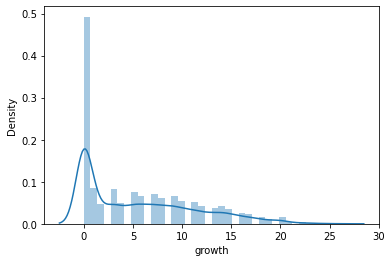

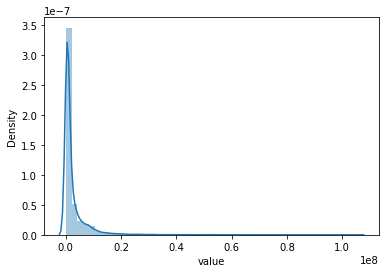

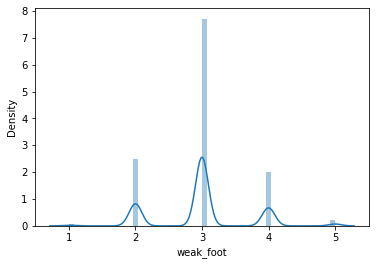

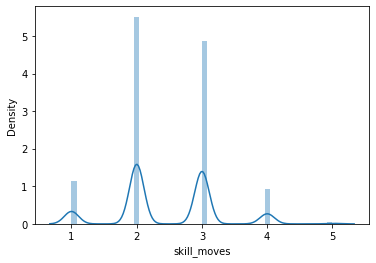

In [58]:
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

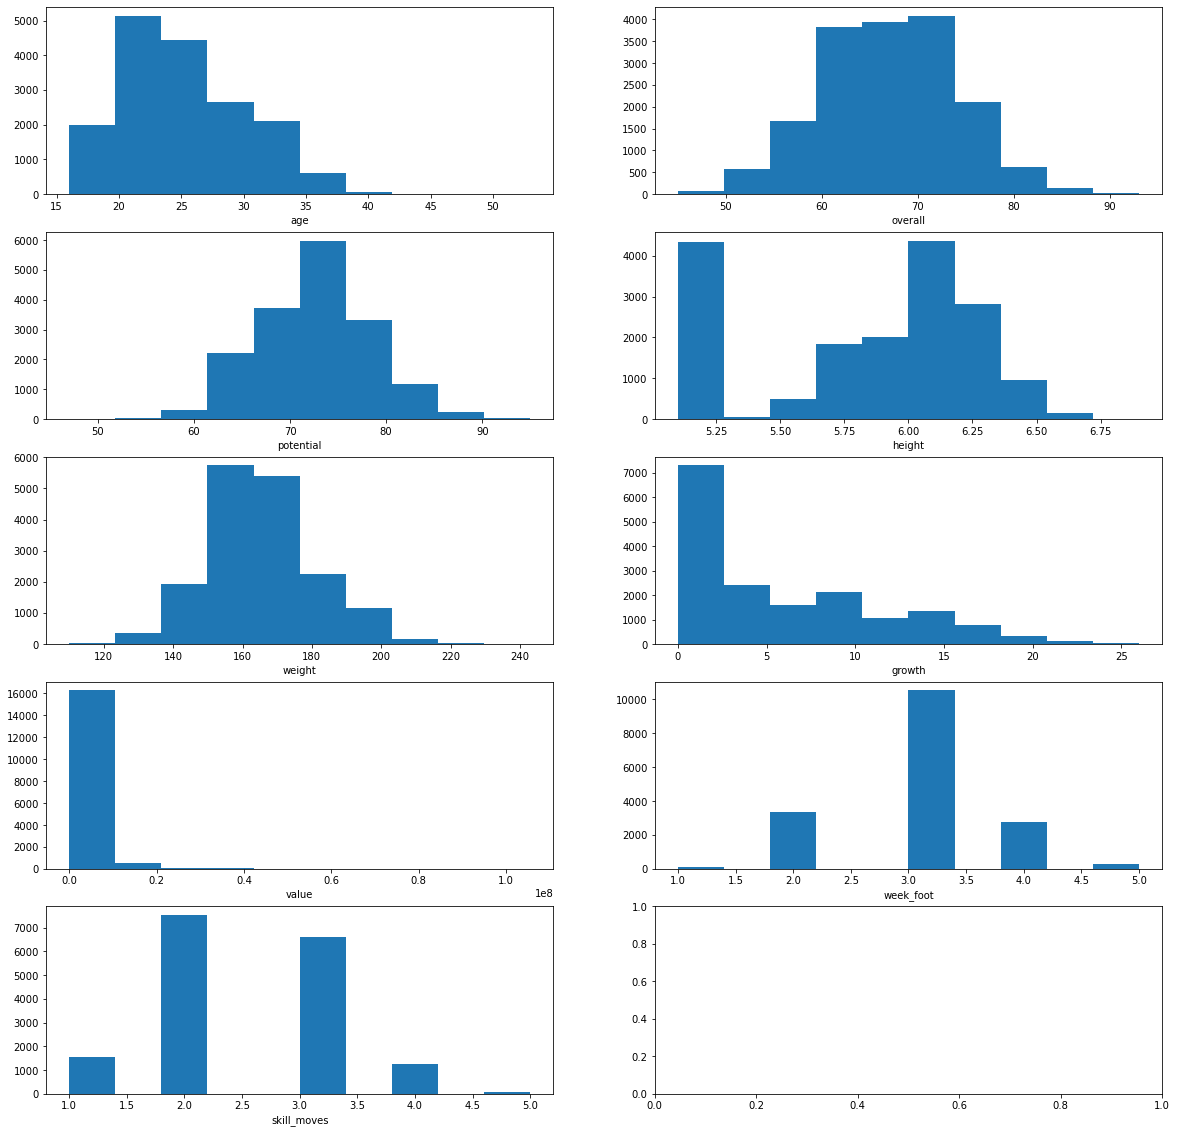

In [60]:
fig, axs = plt.subplots(5,2)

fig.set_figheight(20)
fig.set_figwidth(20)

axs[0, 0].hist(numerical['age'])
axs[0, 0].set_xlabel("age")
axs[0, 1].hist(numerical['overall'])
axs[0, 1].set_xlabel("overall")
axs[1, 0].hist(numerical['potential'])
axs[1, 0].set_xlabel("potential")
axs[1, 1].hist(numerical['height'])
axs[1, 1].set_xlabel("height")
axs[2, 0].hist(numerical['weight'])
axs[2, 0].set_xlabel("weight")
axs[2, 1].hist(numerical['growth'])
axs[2, 1].set_xlabel("growth")
axs[3, 0].hist(numerical['value'])
axs[3, 0].set_xlabel("value")
axs[3, 1].hist(numerical['weak_foot'])
axs[3, 1].set_xlabel("week_foot")
axs[4, 0].hist(numerical['skill_moves'])
axs[4, 0].set_xlabel("skill_moves")

plt.show()

In [56]:
data_corr = df1.corr()
data_corr = round(data_corr,2)
data_corr

,age,overall,potential,height,weight,growth,value,weak_foot,skill_moves
age,1.00,0.52,-0.25,0.06,0.26,-0.86,0.10,0.08,0.08
overall,0.52,1.00,0.59,0.03,0.15,-0.60,0.64,0.20,0.35
potential,-0.25,0.59,1.00,0.00,-0.04,0.30,0.57,0.14,0.25
height,0.06,0.03,0.00,1.00,0.46,-0.03,0.01,-0.12,-0.31
weight,0.26,0.15,-0.04,0.46,1.00,-0.22,0.04,-0.12,-0.35
growth,-0.86,-0.60,0.30,-0.03,-0.22,1.00,-0.19,-0.10,-0.17
value,0.10,0.64,0.57,0.01,0.04,-0.19,1.00,0.15,0.28
weak_foot,0.08,0.20,0.14,-0.12,-0.12,-0.10,0.15,1.00,0.33
skill_moves,0.08,0.35,0.25,-0.31,-0.35,-0.17,0.28,0.33,1.00


<AxesSubplot:>

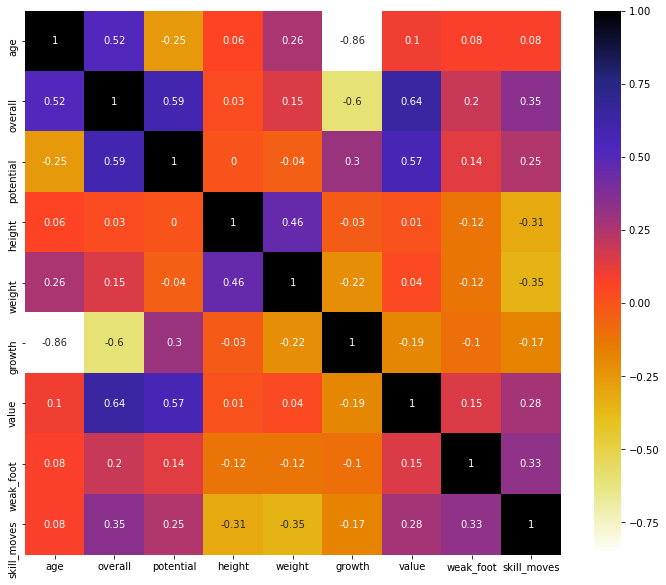

In [61]:
plt.figure(figsize=(12,10))
sns.heatmap(data_corr, annot=True, cmap=plt.cm.CMRmap_r)

In [62]:
def correlation(dataset,threshold):
    col_corr= set()
    corr_matrix = numerical.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname= corr_matrix.columns[i]
                col_corr.add[colname]
    return col_corr

In [65]:
corr_features = correlation(df,0.9) # There is no highly correlated columns
len(set(corr_features))

0

### Processing Data
- Dealing with outliers

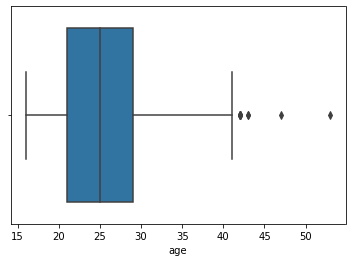

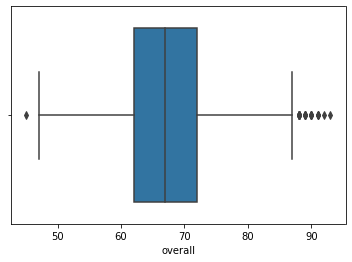

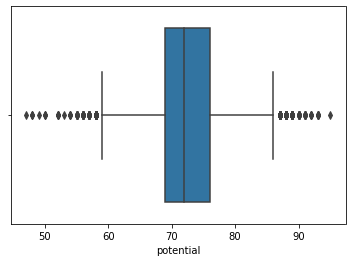

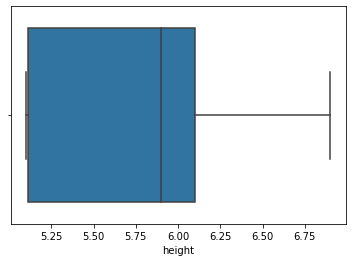

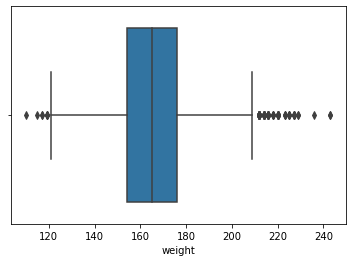

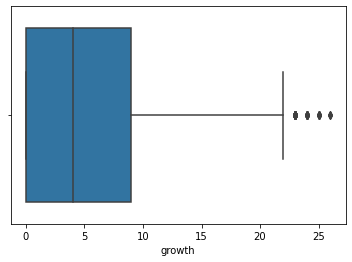

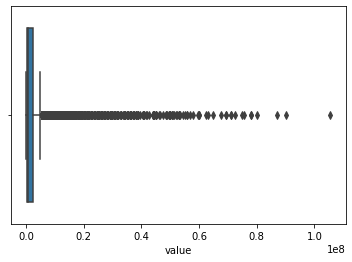

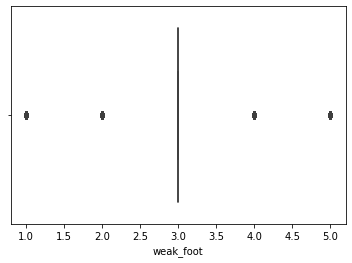

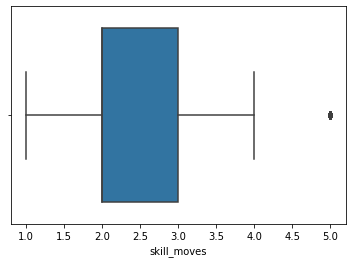

In [66]:
for column in numerical.columns:
    sns.boxplot(numerical[column])
    plt.show()

In [105]:
df2=df1.copy()
df2

,age,overall,best_position,potential,height,weight,growth,value,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,foot
0,33,69,LWB,69,6.0,181,0,625000,3,2,Medium,High,Left
1,37,71,CM,71,5.1,143,0,600000,4,3,Medium,Medium,Right
2,33,71,CAM,71,5.9,161,0,1100000,4,4,Medium,Low,Right
4,36,81,CAM,81,5.7,150,0,5500000,4,4,High,Medium,Right
5,27,66,RW,70,5.8,163,4,725000,2,3,Medium,Medium,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17119,19,60,GK,72,6.1,174,12,300000,2,1,Medium,Medium,Right
17120,22,64,CB,69,6.6,165,5,550000,2,2,Medium,Medium,Right
17121,18,56,CAM,66,5.1,170,10,130000,3,2,Medium,Medium,Right
17122,18,56,RB,67,5.9,154,11,130000,3,2,Medium,Medium,Right


In [176]:
iqr1 = np.percentile(df2['age'],75) - np.percentile(df2['age'],25)
iqr2 = np.percentile(df2['potential'],75) - np.percentile(df2['potential'],25)
iqr3 = np.percentile(df2['weight'],75) - np.percentile(df2['weight'],25)
iqr4 = np.percentile(df2['skill_moves'],75) - np.percentile(df2['skill_moves'],25)
iqr5 = np.percentile(df2['weak_foot'],75) - np.percentile(df2['weak_foot'],25)
iqr6 = np.percentile(df2['growth'],75) - np.percentile(df2['growth'],25)
iqr7 = np.percentile(df2['value'],75) - np.percentile(df2['value'],25)

print(iqr1)
print(iqr2)
print(iqr3)
print(iqr4)
print(iqr5)
print(iqr6)
print(iqr7)

8.0
7.0
22.0
1.0
0.0
9.0
2025000.0


In [177]:
upper_limit1 = np.percentile(df2['age'],75) + 1.5*iqr1
lower_limit1 = np.percentile(df2['age'],25) - 1.5*iqr1
print(upper_limit1, lower_limit1)
upper_limit2 = np.percentile(df2['potential'],75) + 1.5*iqr1
lower_limit2 = np.percentile(df2['potential'],25) - 1.5*iqr1
print(upper_limit2, lower_limit2)
upper_limit3 = np.percentile(df2['weight'],75) + 1.5*iqr1
lower_limit3 = np.percentile(df2['weight'],25) - 1.5*iqr1
print(upper_limit3, lower_limit3)
upper_limit4 = np.percentile(df2['skill_moves'],75) + 1.5*iqr1
lower_limit4 = np.percentile(df2['skill_moves'],25) - 1.5*iqr1
print(upper_limit4, lower_limit4)
upper_limit5 = np.percentile(df2['weak_foot'],75) + 1.5*iqr1
lower_limit5 = np.percentile(df2['weak_foot'],25) - 1.5*iqr1
print(upper_limit5, lower_limit5)
upper_limit6 = np.percentile(df2['growth'],75) + 1.5*iqr1
lower_limit6 = np.percentile(df2['growth'],25) - 1.5*iqr1
print(upper_limit6, lower_limit6)
upper_limit7 = np.percentile(df2['value'],75) + 1.5*iqr1
lower_limit7 = np.percentile(df2['value'],25) - 1.5*iqr1
print(upper_limit7, lower_limit7)


41.0 9.0
88.0 57.0
188.0 142.0
15.0 -10.0
15.0 -9.0
21.0 -12.0
2400012.0 374988.0


In [162]:
df2.reset_index()

,index,age,overall,best_position,potential,height,weight,growth,value,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,foot
0,0,33.0,69,DEFENSIVE,69.0,6.0,181.0,0,625000,3.0,2.0,Medium,High,Left
1,1,37.0,71,MIDFIELD,71.0,5.1,143.0,0,600000,4.0,3.0,Medium,Medium,Right
2,2,33.0,71,MIDFIELD,71.0,5.9,161.0,0,1100000,4.0,4.0,Medium,Low,Right
3,4,36.0,81,MIDFIELD,81.0,5.7,150.0,0,5500000,4.0,4.0,High,Medium,Right
4,5,27.0,66,FORWARD,70.0,5.8,163.0,4,725000,2.0,3.0,Medium,Medium,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17030,17119,19.0,60,GOAL KEEPER,72.0,6.1,174.0,12,300000,2.0,1.0,Medium,Medium,Right
17031,17120,22.0,64,DEFENSIVE,69.0,6.6,165.0,5,550000,2.0,2.0,Medium,Medium,Right
17032,17121,18.0,56,MIDFIELD,66.0,5.1,170.0,10,130000,3.0,2.0,Medium,Medium,Right
17033,17122,18.0,56,DEFENSIVE,67.0,5.9,154.0,11,130000,3.0,2.0,Medium,Medium,Right


In [178]:
df2['age'] = np.where(df2['age'] > upper_limit1,upper_limit1,
                                     np.where(df2['age']<lower_limit1,lower_limit1,df2['age']))
df2['weight'] = np.where(df2['weight'] > upper_limit3,upper_limit3,
                                     np.where(df2['weight']<lower_limit3,lower_limit3,df2['weight']))
df2['skill_moves'] = np.where(df2['skill_moves'] > upper_limit4,upper_limit4,
                                     np.where(df2['skill_moves']<lower_limit4,lower_limit4,df2['skill_moves']))
df2['weak_foot'] = np.where(df2['weak_foot'] > upper_limit5,upper_limit5,
                                     np.where(df2['weak_foot']<lower_limit5,lower_limit5,df2['weak_foot']))
df2['potential'] = np.where(df2['potential'] > upper_limit2,upper_limit2,
                                     np.where(df2['potential']<lower_limit2,lower_limit2,df2['potential']))
df2['growth'] = np.where(df2['growth'] > upper_limit6,upper_limit6,
                                     np.where(df2['growth']<lower_limit6,lower_limit6,df2['growth']))
df2['value'] = np.where(df2['value'] > upper_limit7,upper_limit7,
                                     np.where(df2['value']<lower_limit7,lower_limit7,df2['value']))

<AxesSubplot:xlabel='age'>

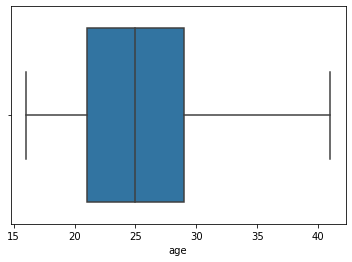

In [117]:
sns.boxplot(x=df2["age"])

<AxesSubplot:xlabel='weight'>

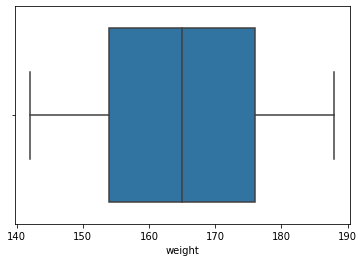

In [118]:
sns.boxplot(x=df2["weight"])

<AxesSubplot:xlabel='skill_moves'>

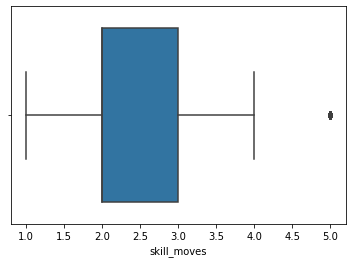

In [119]:
sns.boxplot(x=df2["skill_moves"])

<AxesSubplot:xlabel='value'>

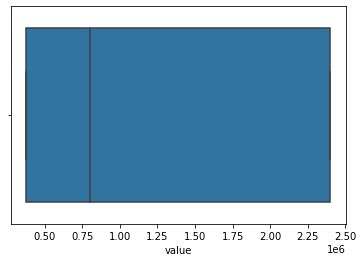

In [179]:
sns.boxplot(x=df2["value"])

In [133]:
bp_mapping = {
    "GK": "GOAL KEEPER",
    "ST": "FORWARD",
    "CF": "FORWARD",
    "RW": "FORWARD",
    "LW": "FORWARD",
    "CAM": "MIDFIELD",
    "CM": "MIDFIELD",
    "RM": "MIDFIELD",
    "LM": "MIDFIELD",
    "CDM": "MIDFIELD",
    "CB": "DEFENSIVE",
    "LWB": "DEFENSIVE",
    "RWB": "DEFENSIVE",
    "LB": "DEFENSIVE",
    "RB": "DEFENSIVE",
}
# Use the replace() method to map old categories to new categories
df2["best_position"] = df2["best_position"].replace(bp_mapping)
#df_object_selected.head()
df2["best_position"].unique()

array(['DEFENSIVE', 'MIDFIELD', 'FORWARD', 'GOAL KEEPER'], dtype=object)

#### x-y split

In [180]:
y = df2['value']
x = df2.drop(['value'], axis=1)
x.head()

,age,overall,best_position,potential,height,weight,growth,weak_foot,skill_moves,attacking_work_rate,defensive_work_rate,foot
0,33.0,69,DEFENSIVE,69.0,6.0,181.0,0.0,3.0,2.0,Medium,High,Left
1,37.0,71,MIDFIELD,71.0,5.1,143.0,0.0,4.0,3.0,Medium,Medium,Right
2,33.0,71,MIDFIELD,71.0,5.9,161.0,0.0,4.0,4.0,Medium,Low,Right
4,36.0,81,MIDFIELD,81.0,5.7,150.0,0.0,4.0,4.0,High,Medium,Right
5,27.0,66,FORWARD,70.0,5.8,163.0,4.0,2.0,3.0,Medium,Medium,Right


In [181]:
x_cat = x.select_dtypes(include='object')
x_cat

,best_position,attacking_work_rate,defensive_work_rate,foot
0,DEFENSIVE,Medium,High,Left
1,MIDFIELD,Medium,Medium,Right
2,MIDFIELD,Medium,Low,Right
4,MIDFIELD,High,Medium,Right
5,FORWARD,Medium,Medium,Right
...,...,...,...,...
17119,GOAL KEEPER,Medium,Medium,Right
17120,DEFENSIVE,Medium,Medium,Right
17121,MIDFIELD,Medium,Medium,Right
17122,DEFENSIVE,Medium,Medium,Right


In [182]:
x_num = x.select_dtypes(include=np.number)
x_num

,age,overall,potential,height,weight,growth,weak_foot,skill_moves
0,33.0,69,69.0,6.0,181.0,0.0,3.0,2.0
1,37.0,71,71.0,5.1,143.0,0.0,4.0,3.0
2,33.0,71,71.0,5.9,161.0,0.0,4.0,4.0
4,36.0,81,81.0,5.7,150.0,0.0,4.0,4.0
5,27.0,66,70.0,5.8,163.0,4.0,2.0,3.0
...,...,...,...,...,...,...,...,...
17119,19.0,60,72.0,6.1,174.0,12.0,2.0,1.0
17120,22.0,64,69.0,6.6,165.0,5.0,2.0,2.0
17121,18.0,56,66.0,5.1,170.0,10.0,3.0,2.0
17122,18.0,56,67.0,5.9,154.0,11.0,3.0,2.0


In [183]:
transformer = MinMaxScaler().fit(x_num)
x_minmax = transformer.transform(x_num)
print(x_minmax.shape)

(17035, 8)


In [184]:
X_num_norm = pd.DataFrame(x_minmax,columns=x_num.columns)
X_num_norm.head() 

,age,overall,potential,height,weight,growth,weak_foot,skill_moves
0,0.68,0.500000,0.387097,0.500000,0.847826,0.000000,0.50,0.25
1,0.84,0.541667,0.451613,0.000000,0.021739,0.000000,0.75,0.50
2,0.68,0.541667,0.451613,0.444444,0.413043,0.000000,0.75,0.75
3,0.80,0.750000,0.774194,0.333333,0.173913,0.000000,0.75,0.75
4,0.44,0.437500,0.419355,0.388889,0.456522,0.190476,0.25,0.50


- Encoding Categorical Data.

In [185]:
x_dummies = pd.get_dummies(x_cat, drop_first=True)
x_dummies

,best_position_FORWARD,best_position_GOAL KEEPER,best_position_MIDFIELD,attacking_work_rate_Low,attacking_work_rate_Medium,defensive_work_rate_Low,defensive_work_rate_Medium,foot_Right
0,0,0,0,0,1,0,0,0
1,0,0,1,0,1,0,1,1
2,0,0,1,0,1,1,0,1
4,0,0,1,0,0,0,1,1
5,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...
17119,0,1,0,0,1,0,1,1
17120,0,0,0,0,1,0,1,1
17121,0,0,1,0,1,0,1,1
17122,0,0,0,0,1,0,1,1


In [186]:
concat_data = pd.concat([X_num_norm.reset_index(drop=True), x_dummies.reset_index(drop=True)], axis=1)
concat_data

,age,overall,potential,height,weight,growth,weak_foot,skill_moves,best_position_FORWARD,best_position_GOAL KEEPER,best_position_MIDFIELD,attacking_work_rate_Low,attacking_work_rate_Medium,defensive_work_rate_Low,defensive_work_rate_Medium,foot_Right
0,0.68,0.500000,0.387097,0.500000,0.847826,0.000000,0.50,0.25,0,0,0,0,1,0,0,0
1,0.84,0.541667,0.451613,0.000000,0.021739,0.000000,0.75,0.50,0,0,1,0,1,0,1,1
2,0.68,0.541667,0.451613,0.444444,0.413043,0.000000,0.75,0.75,0,0,1,0,1,1,0,1
3,0.80,0.750000,0.774194,0.333333,0.173913,0.000000,0.75,0.75,0,0,1,0,0,0,1,1
4,0.44,0.437500,0.419355,0.388889,0.456522,0.190476,0.25,0.50,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17030,0.12,0.312500,0.483871,0.555556,0.695652,0.571429,0.25,0.00,0,1,0,0,1,0,1,1
17031,0.24,0.395833,0.387097,0.833333,0.500000,0.238095,0.25,0.25,0,0,0,0,1,0,1,1
17032,0.08,0.229167,0.290323,0.000000,0.608696,0.476190,0.50,0.25,0,0,1,0,1,0,1,1
17033,0.08,0.229167,0.322581,0.444444,0.260870,0.523810,0.50,0.25,0,0,0,0,1,0,1,1


### Train-test split

In [187]:
X_train, X_test, y_train, y_test = train_test_split(concat_data, y, test_size=0.3, random_state=42)

### Modeling

In [188]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [189]:
predictions  = model.predict(X_test)
predictions

array([1366024.98778329,  995445.87073453, 2052709.6924446 , ...,
        561427.54456816,  559806.61609629, 1468153.8806927 ])

### Model Validation

In [190]:
from sklearn.metrics import mean_absolute_error as mae
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mae(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE =", MAE)

r2 =  0.7316861922188735
RMSE =  427437.6438587674
MSE =  182702939387.5345
MAE = 348344.60391030286
